By :- Aditya Naranje

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.describe(include="all")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
for i in data.columns:
    per = data[i].isnull().sum()/data.shape[0]
    print("Feature {} has {}% data missing".format(i,round(per*100,2)))

Feature ph has 14.99% data missing
Feature Hardness has 0.0% data missing
Feature Solids has 0.0% data missing
Feature Chloramines has 0.0% data missing
Feature Sulfate has 23.84% data missing
Feature Conductivity has 0.0% data missing
Feature Organic_carbon has 0.0% data missing
Feature Trihalomethanes has 4.95% data missing
Feature Turbidity has 0.0% data missing
Feature Potability has 0.0% data missing


In [5]:
mean1 = data["ph"].mean()
mean2 = data["Sulfate"].mean()
mean3 = data["Trihalomethanes"].mean()

In [6]:
data["ph"] = data["ph"].fillna(mean1)
data["Sulfate"] = data["Sulfate"].fillna(mean2)
data["Trihalomethanes"] = data["Trihalomethanes"].fillna(mean3)

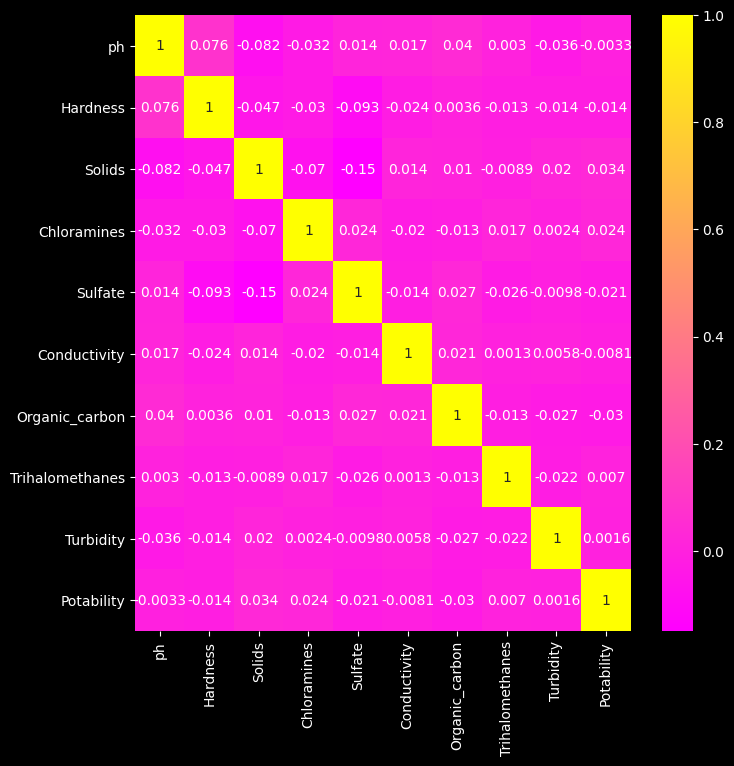

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True, cmap = "spring")
plt.show()

In [8]:
X = data.drop(columns=["Potability"])
y = data["Potability"]

Balancing the dataset

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sample, y_sample = smote.fit_resample(X, y)

print('Original dataset \n',y.value_counts()) 
print('Resample dataset \n', y_sample.value_counts())

Original dataset 
 0    1998
1    1278
Name: Potability, dtype: int64
Resample dataset 
 0    1998
1    1998
Name: Potability, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sample,y_sample,test_size=0.15, random_state=101)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [14]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1692
           1       0.52      0.50      0.51      1704

    accuracy                           0.51      3396
   macro avg       0.51      0.51      0.51      3396
weighted avg       0.51      0.51      0.51      3396

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       306
           1       0.51      0.50      0.51       294

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



In [15]:
print(confusion_matrix(y_train,train_pred))
print(confusion_matrix(y_test,test_pred))

[[896 796]
 [852 852]]
[[162 144]
 [146 148]]


In [16]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("ET",ExtraTreesClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("SVC",SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("GNB",GaussianNB()))

In [17]:
for name, model in models:
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(name)
    print(classification_report(y_train,train_pred))
    print(classification_report(y_test,test_pred))
    
    print(confusion_matrix(y_train,train_pred))
    print(confusion_matrix(y_test,test_pred))
    print('')

LR
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1692
           1       0.52      0.50      0.51      1704

    accuracy                           0.51      3396
   macro avg       0.51      0.51      0.51      3396
weighted avg       0.51      0.51      0.51      3396

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       306
           1       0.51      0.50      0.51       294

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600

[[896 796]
 [852 852]]
[[162 144]
 [146 148]]

DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1692
           1       1.00      1.00      1.00      1704

    accuracy                           1.00      3396
   macro avg       1.00      1.00      1.00      3396
weighted avg       1.

In [18]:
model1 = GradientBoostingClassifier()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = ExtraTreesClassifier()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)


pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
pred_prob3 = model3.predict_proba(x_test)
pred_prob4 = model4.predict_proba(x_test)

In [19]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [20]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


print(auc_score1,",", auc_score2,"," ,auc_score3,",",auc_score4)

0.6962451647325598 , 0.6607976523942911 , 0.7702247565692945 , 0.809134765017118


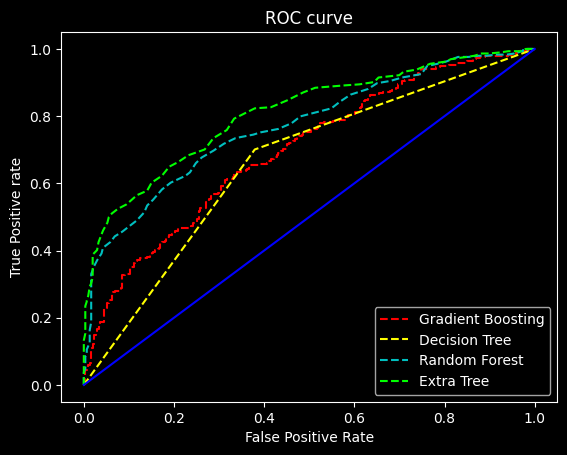

In [21]:
plt.plot(fpr1, tpr1, linestyle='--',color='r', label='Gradient Boosting')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='c', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='lime', label='Extra Tree')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

lets take extra tree

In [22]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

ExtraTreesClassifier()

## Saving model using pickle

In [23]:
import pickle

In [24]:
pickle_out = open("water_potability.pkl","wb")
pickle.dump(model,pickle_out)
loaded_model = pickle.load(open("water_potability.pkl","rb"))
result = loaded_model.score(x_test,y_test)
print(result)

0.7116666666666667
